## Configurações

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score

from imblearn.over_sampling import SMOTE

In [46]:
df = pd.read_csv('../data/input/creditcard_clean.csv')

## Pré-processamento para Machine Learning

In [47]:
features = df.columns[:-1]
target = df.columns[-1]

print(f'Features: {features}')
print(f'Target: {target}')

Features: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Target: Class


In [48]:
y = df['Class']
X = df.drop('Class', axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
def calculate_metrics(y_true, y_pred, y_proba, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Modelo": model_name,
        "ROC-AUC": roc_auc_score(y_true, y_proba),
        "PR-AUC": average_precision_score(y_true, y_proba),
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1": report["1"]["f1-score"],
    }

## Árvore de Decisão Normal

In [51]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=42, class_weight='balanced')

In [52]:
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [53]:
y_pred_test = tree.predict(X_test)

In [54]:
y_pred_train = tree.predict(X_train)

In [55]:
results_normal_test = calculate_metrics(y_test, y_pred_test, tree.predict_proba(X_test)[:,1], "Normal")
results_normal_train = calculate_metrics(y_train, y_pred_train, tree.predict_proba(X_train)[:,1], "Normal")

In [56]:
cm_normal = confusion_matrix(y_test, y_pred_test)

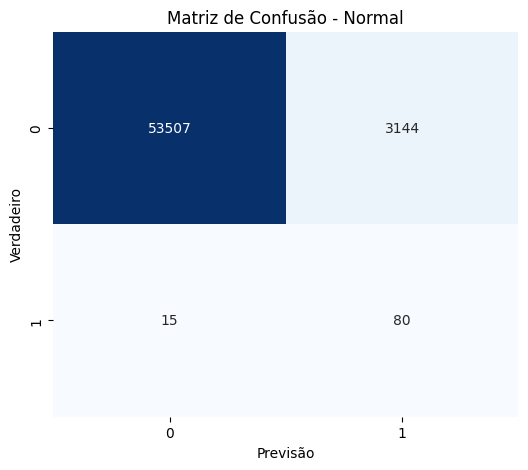

In [57]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_normal, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Normal')
plt.show()

## Árvore de Decisão com SMOTE

In [58]:
sm = SMOTE(random_state=42)

In [59]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [60]:
tree_sm = DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=42, class_weight='balanced')

In [61]:
tree_sm.fit(X_train_sm, y_train_sm)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [62]:
y_pred_test_sm = tree_sm.predict(X_test)

In [63]:
y_pred_train_sm = tree_sm.predict(X_train_sm)

In [64]:
results_smote_test = calculate_metrics(y_test, y_pred_test_sm, tree_sm.predict_proba(X_test)[:,1], "SMOTE")
results_smote_train = calculate_metrics(y_train_sm, y_pred_train_sm, tree_sm.predict_proba(X_train_sm)[:,1], "SMOTE")

In [65]:
cm_sm = confusion_matrix(y_test, y_pred_test_sm)

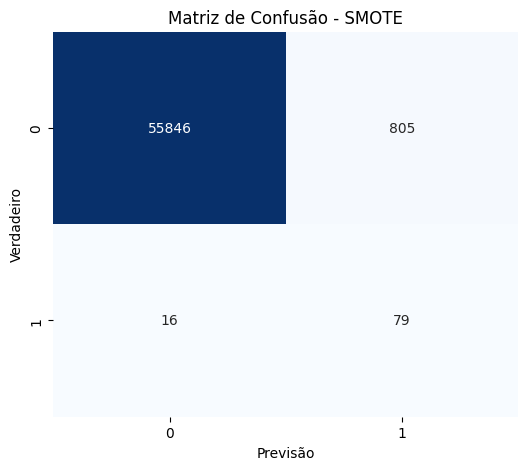

In [66]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_sm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - SMOTE')
plt.show()

## Árvore de Decisão com Pesos Ajustados

In [67]:
tree_w = DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=42, class_weight='balanced')

In [68]:
tree_w.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [69]:
y_pred_w_test = tree_w.predict(X_test)

In [70]:
y_pred_w_train = tree_w.predict(X_train)

In [71]:
results_weights_test = calculate_metrics(y_test, y_pred_w_test, tree_w.predict_proba(X_test)[:,1], "Pesos Ajustados")
results_weights_train = calculate_metrics(y_train, y_pred_w_train, tree_w.predict_proba(X_train)[:,1], "Pesos Ajustados")

In [72]:
cm_w = confusion_matrix(y_test, y_pred_w_test)

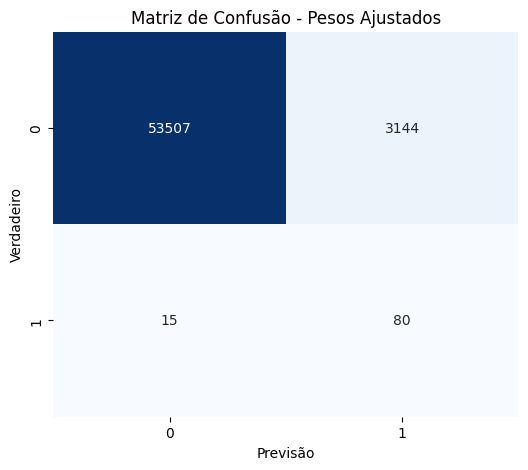

In [73]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_w, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Pesos Ajustados')
plt.show()

## Comparação dos Modelos

In [74]:
df_results_test = pd.DataFrame([results_normal_test, results_smote_test, results_weights_test])

In [75]:
df_results_test

,Modelo,ROC-AUC,PR-AUC,Precision,Recall,F1
0,Normal,0.915827,0.344943,0.024814,0.842105,0.048207
1,SMOTE,0.931064,0.075707,0.089367,0.831579,0.161389
2,Pesos Ajustados,0.915827,0.344943,0.024814,0.842105,0.048207


In [76]:
df_results_train = pd.DataFrame([results_normal_train, results_smote_train, results_weights_train])

In [77]:
df_results_train

,Modelo,ROC-AUC,PR-AUC,Precision,Recall,F1
0,Normal,0.971957,0.396263,0.028022,0.944444,0.054429
1,SMOTE,0.978743,0.972281,0.985804,0.946324,0.965661
2,Pesos Ajustados,0.971957,0.396263,0.028022,0.944444,0.054429
